## Zeitlicher Ablauf der Datenerfassung

### Einleitung

In diesem Notebook geht es darum den zeitlichen Ablauf der Datenerfassung darzustellen.
Dabei werden als zeitliche Kennzahlen die arithmetischen Mittelwerte genutzt.   
Die Daten werden mit einer Smartphone Android App erfasst (https://github.com/SandGreif/Fahrradwege-Monitoring-App).

In [66]:
import pandas
import os
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
featuresDf = pandas.read_csv("../daten/merkmale.csv")
featuresDf.describe()

,Zeitstempel,Breitengrad,Laengengrad,Geschwindigkeit,Messwerte,StartZeitfenster,StartBewegungsdaten,StartBelichtung,Belichtungszeit,MittelX,...,VarianzX,VarianzY,VarianzZ,VarianzNick,VarianzRoll,AbweichungX,AbweichungY,AbweichungZ,AbweichungNick,AbweichungRoll
count,4.983200e+04,49832.000000,49832.000000,49832.000000,49832.000000,4.983200e+04,4.983200e+04,4.983200e+04,4.983200e+04,49832.000000,...,49832.000000,49832.000000,49832.000000,49832.000000,49832.000000,49832.000000,49832.000000,49832.000000,49832.000000,49832.000000
mean,1.521224e+12,53.605875,10.124876,14.072868,19.367154,7.625330e+13,7.625324e+13,7.625334e+13,1.251697e+07,1.039408,...,3.883103,24.962929,39.812381,0.374660,0.621674,1.652709,4.056810,5.213922,0.552162,0.548176
std,7.284217e+07,0.028515,0.062429,3.577643,0.615640,3.231985e+13,3.231984e+13,3.231985e+13,7.872093e+06,0.662132,...,6.965085,49.019729,65.552239,0.338714,1.243568,1.073163,2.916401,3.553541,0.264156,0.566731
min,1.521124e+12,53.557396,10.002181,5.004000,6.000000,2.999506e+13,2.999499e+13,2.999509e+13,9.376720e+05,0.089458,...,0.012640,0.006250,0.066030,0.000690,0.000150,0.112430,0.079060,0.256960,0.026270,0.012250
25%,1.521128e+12,53.577670,10.072659,11.700000,19.000000,3.372892e+13,3.372885e+13,3.372895e+13,7.528958e+06,0.598467,...,0.879678,4.812448,7.693005,0.118540,0.027678,0.937910,2.193730,2.773625,0.344300,0.166363
50%,1.521212e+12,53.613132,10.140025,14.292000,19.000000,7.307148e+13,7.307141e+13,7.307151e+13,1.000184e+07,0.870627,...,1.914450,10.709740,17.597280,0.268690,0.088170,1.383635,3.272575,4.194910,0.518350,0.296930
75%,1.521297e+12,53.626503,10.162369,16.631998,20.000000,1.080197e+14,1.080196e+14,1.080197e+14,2.000368e+07,1.287063,...,4.265810,24.578618,42.988410,0.537238,0.554593,2.065380,4.957685,6.556550,0.732965,0.744712
max,1.521302e+12,53.656776,10.229659,24.804000,48.000000,1.122372e+14,1.122371e+14,1.122372e+14,3.287369e+07,10.997221,...,274.079180,990.233590,1172.286260,3.329020,18.654280,16.555340,31.467980,34.238670,1.824560,4.319060


In [32]:
# Mittelwert der Belichtungszeit aller Aufnahmen umgerechnet in ms
meanExposureTime = featuresDf.Belichtungszeit.mean() / 1000000
meanExposureTime

12.51697357946701

In [36]:
# Mittelwert Anzahl der Messwerte pro Merkmal
featuresDf.Messwerte.mean()

19.36715363621769

In [25]:
# Mittelwert vom Start der Messwert Datenerfassung 
# zu den erfassten Daten gehören von den Beschleunigungssensor die 3-Achsen Messwerte
meanStartMeasurementDataTime = featuresDf.StartZeitfenster.mean() - featuresDf.StartBewegungsdaten.mean()
meanStartMeasurementDataTimeToStartTimeframeTime

62818063.953125

Bei der Berechnung des zeitlichen Abstandes von erfassten Bildaufnahmen ist zu beachten, dass die verwendete Daten aus einer Datenerfassungsserie stammen also einem Datensatz.      
Als Kennwert wird nämlich die Zeitstempel Spalte aus der Merkmal CSV Datei genutzt. Der Zeitstempel gibt an, wann das Bild aufgenommen wurde in Unixzeit. Zwischen zwei erfassten    
Datensätzen ist meistens einige Zeit mehr vergangen. Deshalb wird für die Berechnung ein Datensatz genutzt. Der angegebene Zeitwert wird in dem Notebook frameRate berechnet in dem Ordner datenanalyse. 

In [33]:
# Mittelwert des Abstandes bis das nächste Bild aufgenommen wurde von den Datensatz 15 mit 305.906 ms aufgerundet auf 306 Ms.
# Hierbei ist zu beachten 
meanCaptureImagesTime = 306 

In [121]:
# In dieser Zelle werden die Vielfachen der Mittelwerte in Listen angehängt, um exemplarisch
# den weiteren Verlauf einer Datenserie mit gemittelten Zeitwerten in einem Diagram darzustellen.

# Anzahl der Bilder
numberImages = 4
imageCounter = 1
timeframe = 80
meanExposureOffset = (timeframe - meanExposureTime) / 2
# Listen die mit den entsprechenden Vielfachen der Zeitangaben gefüllt werden
meanCaptureImagesTimeList = []
startTimeFrameList = []
startExposureTimeList = []
exposureTimeList = []
while imageCounter <= numberImages:
    meanCaptureImagesTimeList.append(meanCaptureImagesTime * imageCounter)
    startTimeFrameList.append(meanCaptureImagesTimeList[imageCounter-1] - timeframe)
    startExposureTimeList.append(startTimeFrameList[imageCounter-1] + meanExposureOffset)
    exposureTimeList.append(startExposureTimeList[imageCounter-1] + meanExposureTime)
    imageCounter = imageCounter + 1
    

In [122]:
meanCaptureImagesTimeList

[306, 612, 918, 1224]

In [123]:
startTimeFrameList

[226, 532, 838, 1144]

In [124]:
meanExposureTimeList

[12.51697357946701]

In [125]:
meanExposureOffset

33.741513210266497

In [126]:
startExposureTimeList

[259.74151321026648,
 565.74151321026648,
 871.74151321026648,
 1177.7415132102665]

In [127]:
exposureTimeList

[272.25848678973347,
 578.25848678973352,
 884.25848678973352,
 1190.2584867897335]

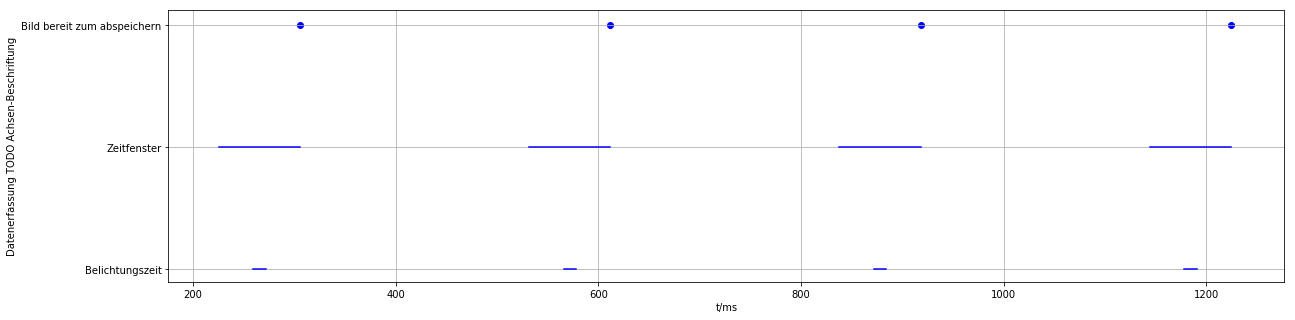

In [129]:
yLabel = ["Bild bereit zum abspeichern","Zeitfenster", "Belichtungszeit"]
fig, ax = plt.subplots(figsize=(20,5))
i = 0
while i < numberImages:
    ax.plot([startExposureTimeList[i],exposureTimeList[i]],[yLabel[2],yLabel[2]], c='b')
    ax.plot([startTimeFrameList[i],startTimeFrameList[i]+timeframe],[yLabel[1],yLabel[1]], c='b')
    ax.scatter(meanCaptureImagesTimeList[i],[yLabel[0]], c='b') 
    i = i + 1
plt.ylabel('Datenerfassung TODO Achsen-Beschriftung')    
plt.xlabel('t/ms')
plt.grid()

In [90]:
[yLabel[0]]

['Bild bereit zum abspeichern']

In [89]:
yLabel

['Bild bereit zum abspeichern', 'Zeitfenster', 'Belichtungszeit']

In [104]:
[yLabel[1],yLabel[1]]

['Zeitfenster', 'Zeitfenster']